# Machine Learning & Statistics Module
### Assessment by Simona Vasiliauskaite G00263352
### Analysis of Boston Housing Database






 # Section 1.
 **Summary of the Boston House Prices dataset using descriptive analysis and plots.**

Before analysing data, import and load the required Python libraries and the dataset as shown below.

In [22]:
# Import Python libraries needed for this project

# For neural networks.
import keras as kr

# For numerical arrays.
import numpy as np

#2Dplotting
import matplotlib.pyplot as plt 

# For data frames.
import pandas as pd  
# for data visalisation
import seaborn as sns
import scipy.stats as stats

import sklearn
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

import statsmodels.api as sm
# statsmodels is a Python module that provides classes and functions for the
# estimation of many different statistical models, as well as for conducting
# statistical tests, and statistical data exploration (2)

%matplotlib inline

In [2]:
# Import Boston Housing dataset from sci-kit learn library
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Check what field names are in this dataset

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Print the dataset description

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Describe method allowed me to overview the data in more detail and indicated that Median Value is normally the target. This method also provided me with a summary of other 13 variables that might influence the price of the houses such as access to highways, average number of rooms per house, business per town or crime rate to name a few.

Before using predictive analysis, I created a DataFrame called 'bhp' short for Boston House Prices which contains all the data. I checked for the first 5 columns of the dataset using head()

In [5]:
# create a dataframe with pandas
# add columns
#check for first 5 rows

bhp = pd.DataFrame(boston.data)
bhp.columns = boston.feature_names
bhp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In order to be able to check the relationship between the variables and the target, create another variable 'price' which will be used to compare against the variables.

In [6]:
bhp['PRICE'] = boston.target
#check that the variable is created and get basic summary stats
bhp.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Observations

From the quick summary statistics above, we can find some interesting facts about the areas/neighborhoods in Boston.

1. The average crime rate per town is 3.61.
2. Average number of rooms per house is around 6 but minimum 3 and maximum approx. 8.
3. On average approx. 68 out of a 100 houses were built before 1940
4. The average weighted distance to an employment center in Boston is 3.8.
5. On average there are 18 pupils to one teacher. Max there are 22 pupils to one teacher.
6. The % of lower status population on average is 12.65 but in some areas increases to approx. 38%


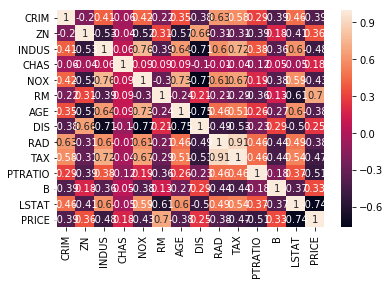

In [7]:
# correlation matric to visualise the linear relationship
# between the variables (3)

correlation_matrix = bhp.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

From the matrix it is clear that RM variable has a strong positive correlation with our target value and LSTAT has a high negative correlation with the target value.

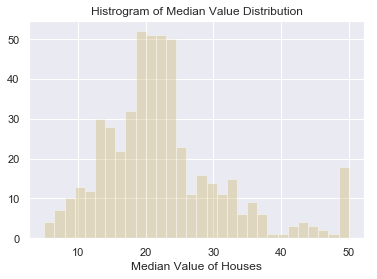

In [8]:
# from seaborn library
# reference: https://seaborn.pydata.org/tutorial/distributions.html

sns.set()
sns.distplot(bhp['PRICE'], hist=True, kde=False, rug_kws={"color": "g"}, color="y", bins=30)

plt.title('Histrogram of Median Value Distribution')
plt.xlabel('Median Value of Houses')
plt.show()

## Variable Relationship - Linear Regression

Now that the price variable is created, it is possible to create a linear model and check some probabilities and predictions mentioned earlier.

1. Does the value of the house increase if it contains more rooms?
2. Does crime rate or population status impact house value?
3. Do better employment and education opportunities in the area mean higher house prices?
4. Are houses more expensive alongside River Charles?


**Show linear model using regplot from Seaborn**

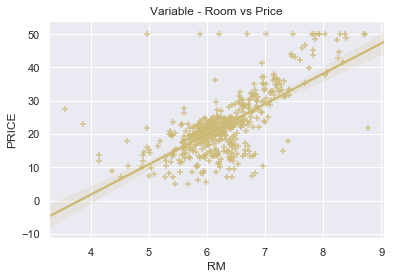

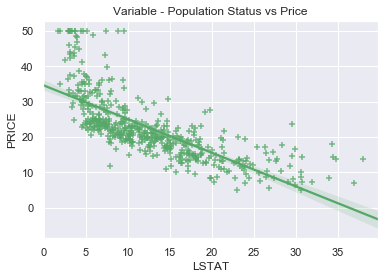

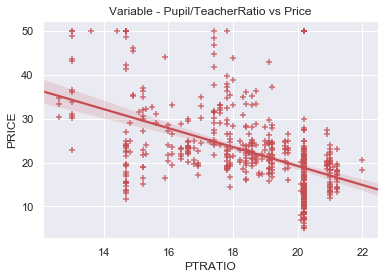

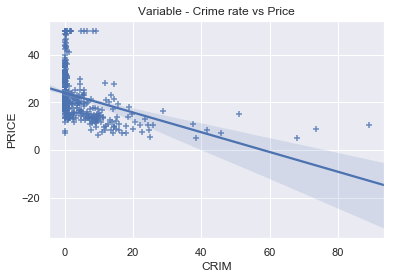

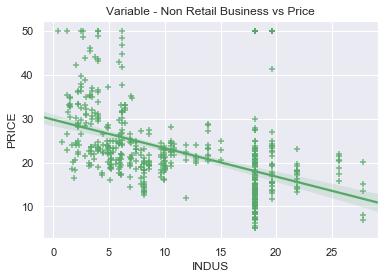

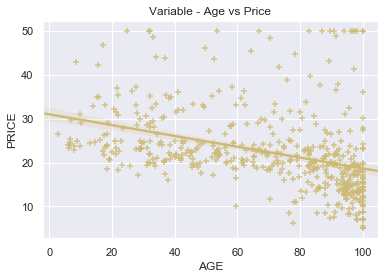

In [9]:
# plot the relationship using regplot
# mark axis, choose colour/marker
# add title and show

sns.regplot(data=bhp, y='PRICE', x='RM', color="y",marker="+", fit_reg = True)
plt.title('Variable - Room vs Price')
plt.show()

sns.regplot(data=bhp, y='PRICE', x='LSTAT', color="g",marker="+", fit_reg = True)
plt.title('Variable - Population Status vs Price')
plt.show()

sns.regplot(data=bhp, y='PRICE', x='PTRATIO', color="r",marker="+", fit_reg = True)
plt.title('Variable - Pupil/TeacherRatio vs Price')
plt.show()

sns.regplot(data=bhp, y='PRICE', x='CRIM', color="b",marker="+", fit_reg = True)
plt.title('Variable - Crime rate vs Price')
plt.show()

sns.regplot(data=bhp, y='PRICE', x='INDUS', color="g",marker="+", fit_reg = True)
plt.title('Variable - Non Retail Business vs Price')
plt.show()

sns.regplot(data=bhp, y='PRICE', x='AGE', color="y",marker="+", fit_reg = True)
plt.title('Variable - Age vs Price')
plt.show()


# reference - https://seaborn.pydata.org/generated/seaborn.regplot.html


As expected, from the scatterplots we can see that the price of the houses is higher where the houses contain more rooms.
We can also observe that where the status of the population is lower in the area, the house prices also tend to decrease.
We can see that when the ratio of pupils per teacher start to increase, the house prices decrease.
Crimate rate looks to hugely impact the prices too. The lower the crimate rate the higher the price.
No surpise that the older the house (built prior 1940) the value of the house decreases.

### Section 2. 
Using statistics analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 

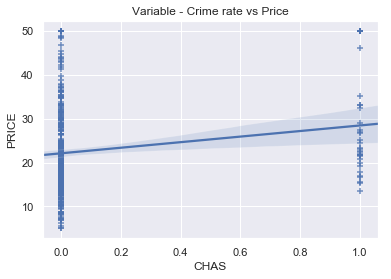

In [10]:
sns.regplot(data=bhp, y='PRICE', x='CHAS', color="b",marker="+", fit_reg = True)
plt.title('Variable - Crime rate vs Price')
plt.show()


## Observation
From descriptive statistics we know that 1 if tract bounds river; 0 otherwise. Looking at the scatterplot, the housing prices are higher for the houses located closer to river Charles and there are significantly less houses located by the river. Price increase closer to rivers could be due to newer developments, better views etc.

## Section 3.

Using keras create a neural network that can predict the median house price based on the other variables in the dataset.

### Building & Training

In [11]:
# adapted from https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/dogs.ipynb

In [12]:
import keras as kr
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=4, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [21]:
from sklearn.model_selection import train_test_split
X = bhp.iloc[:,:-1]
y = bhp.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = model.predict(X_test)
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test)) 

MAE 3.609904060381819
MSE 27.195965766883344
RMSE 5.2149751453754165
Score: 0.673382550640018


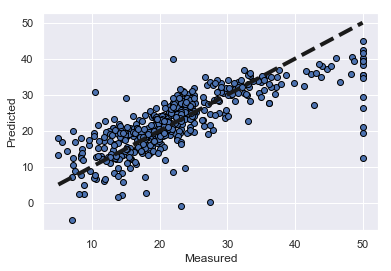

In [17]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()
X, y = datasets.load_boston(return_X_y=True)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Conclusion


The use of explanatory and inferential statistics allowed to compare and analyse different variables within the dataset and understand how they might influence the value of the residential properties. Various factors such as crime, employment and education opportunities, socio status of population all determine the value of the houses. Some of these factors devalue an area and impact nearby neighbourhoods too. 



# References:

1.https://realpython.com/linear-regression-in-python/
2.https://www.statsmodels.org/stable/index.html
3.https://seaborn.pydata.org/generated/seaborn.heatmap.html
